In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import matplotlib

matplotlib.rcParams['svg.fonttype'] = 'none'

In [2]:
#Set up loop to read each file
i = 0
filenames = sorted(glob.glob('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/data/exercise_testing/*.CSV'))
for filename in filenames:
    print(filename)
    
    vo2 = pd.read_csv(filename, header=[17], index_col=[0])
    vo2 = vo2.iloc[2:-2,:]
    vo2 = vo2[["DATE/TIME", "VO2", "RER"]]
    vo2["VO2"] = vo2["VO2"].astype(str).astype(int)
    vo2["RER"] = vo2["RER"].astype(str).astype(float)
    vo2["DATE/TIME"] = pd.to_datetime(vo2['DATE/TIME'])
    
    #turn VO2 into mL/kg/min.
    vo2["VO2"] = vo2["VO2"]/60
    
    #select each segment of data
    Baseline = vo2.iloc[24:35,:]
    VO2_Baseline = Baseline['VO2'].mean()
    RER_Baseline = Baseline['RER'].mean()

#Peak Values for RQ and VO2 will be obtained from Rows 36-20th from last row

    Peak = vo2
    VO2_Peak = Peak['VO2'].max()
    RER_Peak = Peak['RER'].max()

#The recovery period will be the 20th-10th from the last row

    Recovery = vo2.iloc[-20:-10,:]
    VO2_Recovery = Recovery['VO2'].mean()
    RER_Recovery = Recovery['RER'].mean()
    
    Calorimetry = np.array([[VO2_Baseline, RER_Baseline], 
                            [VO2_Peak, RER_Peak],[VO2_Recovery, RER_Recovery]])

    Calorimetry_DF = pd.DataFrame(data = Calorimetry, index = 
                                  ["Baseline", "Peak", "Recovery"], columns = ["VO2", "RER"])
    
    Index = filename
    Calorimetry_DF["Period"] = ['Baseline', 'Peak', 'Recovery']
    Calorimetry_DF["Index"] = [Index,Index,Index]
    Calorimetry_DF["Status"] = ['Pre','Pre','Pre']
    i = i + 1
    Calorimetry_DF["Mouse"] = [i, i, i]
    Calorimetry_DF = Calorimetry_DF.set_index('Index')
    
    file_name = filename+'_analyzed'+'.csv'
    Calorimetry_DF.to_csv(file_name, index=False)

/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/data/exercise_testing/20220205_CancerExercise_Pre_01.0201.CSV
/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/data/exercise_testing/20220205_CancerExercise_Pre_02.0201.CSV
/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/data/exercise_testing/20220205_CancerExercise_Pre_03.0201.CSV
/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/data/exercise_testing/20220205_CancerExercise_Pre_04.0201.CSV
/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/data/exercise_testing/20220205_CancerExercise_Pre_05.0201.CSV
/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/data/exercise_testing/20220205_CancerExercise_Pre_06.0201.CSV
/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/data/exercis

In [6]:
#Concatenate all of the analyzed files together

file_names = sorted(glob.glob('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/data/exercise_testing/*analyzed.csv'))

Master_Cancer_Wheels_Vo2 = pd.concat([pd.read_csv(f) for f in file_names])
#Master_Cancer_Wheels_Vo2.to_csv("/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/exercise_testing/Master_Cancer_Wheels_Vo2.csv", index=False)

In [7]:
Master_Cancer_Wheels_Vo2['Condition'] = ['Exercise', 'Exercise', 'Exercise', 'Sedentary', 'Sedentary', 'Sedentary'] * 8

In [12]:
Master_Cancer_Wheels_Vo2

,VO2,RER,Period,Status,Mouse,Condition
0,69.769697,0.800364,Baseline,Pre,1,Exercise
1,90.233333,0.952000,Peak,Pre,1,Exercise
2,59.985000,0.759000,Recovery,Pre,1,Exercise
0,76.980303,0.768636,Baseline,Pre,2,Sedentary
1,93.716667,0.949000,Peak,Pre,2,Sedentary
2,69.640000,0.735200,Recovery,Pre,2,Sedentary
0,70.934848,0.780000,Baseline,Pre,3,Exercise
1,98.616667,0.914000,Peak,Pre,3,Exercise
2,64.755000,0.730200,Recovery,Pre,3,Exercise
0,68.801515,0.764727,Baseline,Pre,4,Sedentary


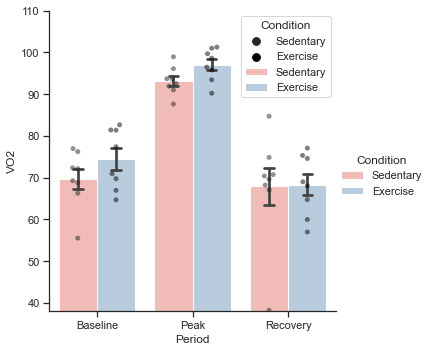

In [24]:
#Calculate mean, SD, and perform RM ANOVA on Baseline, Peak, and Recovery
#Plot the results
sns.set_theme(style="ticks", palette="Pastel1")
sns.catplot(x="Period", y="VO2", hue='Condition', kind='bar', ci=68, 
capsize=0.1, hue_order= ["Sedentary", "Exercise"], data=Master_Cancer_Wheels_Vo2)
sns.swarmplot(x="Period", y="VO2", hue='Condition', hue_order= ["Sedentary", "Exercise"],data=Master_Cancer_Wheels_Vo2, color="0", dodge=True, alpha=.5)
plt.ylim(38, 110)
plt.savefig('../figures/grouped_VO2_peak.svg', dpi=300, bbox_inches='tight')

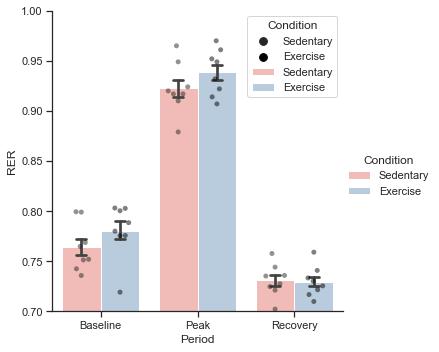

In [22]:
#Calculate mean, SD, and perform RM ANOVA on Baseline, Peak, and Recovery
#Plot the results
sns.set_theme(style="ticks", palette="Pastel1")
sns.catplot(x="Period", y="RER", hue='Condition', kind='bar', ci=68, capsize=0.1, hue_order= ["Sedentary", "Exercise"], data=Master_Cancer_Wheels_Vo2)
sns.swarmplot(x="Period", y="RER", hue='Condition', hue_order= ["Sedentary", "Exercise"],data=Master_Cancer_Wheels_Vo2, color="0", dodge=True, alpha=.5)
plt.ylim(0.7, 1.0)
plt.savefig('../figures/grouped_RER.svg', dpi=300, bbox_inches='tight')

In [37]:
Baseline = Master_SepsisWheels_Vo2[Master_SepsisWheels_Vo2['Period'] == 'Baseline']
Peak = Master_SepsisWheels_Vo2[Master_SepsisWheels_Vo2['Period'] == 'Peak']
Recovery = Master_SepsisWheels_Vo2[Master_SepsisWheels_Vo2['Period'] == 'Recovery']

In [38]:
Peak_METs = np.array(Peak['VO2']) / np.array(Baseline['VO2'])

In [39]:
Baseline['Baseline_VO2'] = Baseline['VO2']
Baseline['Baseline_RER'] = Baseline['RER']
Peak['Peak_VO2'] = Peak['VO2']
Peak['Peak_RER'] = Peak['RER']
Recovery['Recovery_VO2'] = Recovery['VO2']
Recovery['Recovery_RER'] = Recovery['RER']

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_64292/2431999430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Baseline['Baseline_VO2'] = Baseline['VO2']
/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_64292/2431999430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Baseline['Baseline_RER'] = Baseline['RER']
/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_64292/2431999430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [40]:
Exercise_Testing = Baseline[['Mouse', 'Condition', 'Baseline_VO2', 'Baseline_RER']]

In [41]:
Exercise_Testing['Peak_VO2'] = Peak['Peak_VO2'].tolist()
Exercise_Testing['Peak_RER'] = Peak['Peak_RER'].tolist()
Exercise_Testing['Peak_METs'] = Peak_METs
Exercise_Testing['Recovery_VO2'] = Recovery['Recovery_VO2'].tolist()
Exercise_Testing['Recovery_RER'] = Recovery['Recovery_RER'].tolist()

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_64292/1991620297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Exercise_Testing['Peak_VO2'] = Peak['Peak_VO2'].tolist()
/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_64292/1991620297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Exercise_Testing['Peak_RER'] = Peak['Peak_RER'].tolist()
/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_64292/1991620297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a co

In [42]:
#Add max speed
Exercise_Testing['MaxSpeed'] = [32, 36, 32, 24, 31, 23, 28, 23, 37, 30, 33, 29, 33, 26, 40, 41]

In [43]:
Exercise_Testing

,Mouse,Condition,Baseline_VO2,Baseline_RER,Peak_VO2,Peak_RER,Peak_METs,Recovery_VO2,Recovery_RER,MaxSpeed
0,1,Exercise,69.769697,0.800364,90.233333,0.952,1.293303,59.985000,0.7590,32
0,2,Sedentary,76.980303,0.768636,93.716667,0.949,1.217411,69.640000,0.7352,36
0,3,Exercise,70.934848,0.780000,98.616667,0.914,1.390243,64.755000,0.7302,32
0,4,Sedentary,68.801515,0.764727,91.033333,0.965,1.323130,70.416667,0.7441,24
0,5,Exercise,66.974242,0.788455,93.450000,0.949,1.395313,77.090000,0.7333,31
0,6,Sedentary,72.371212,0.735727,87.633333,0.917,1.210887,68.256667,0.7246,23
0,7,Exercise,77.407576,0.719091,95.816667,0.907,1.237820,74.606667,0.7098,28
0,8,Sedentary,76.251515,0.799364,92.533333,0.924,1.213528,84.730000,0.7577,23
0,9,Exercise,82.680303,0.803091,101.016667,0.932,1.221774,68.055000,0.7167,37
0,10,Sedentary,72.174242,0.742455,96.116667,0.920,1.331731,74.870000,0.7275,30


In [44]:
#Exercise_Testing.to_csv('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/data/exercise_testing/exercise_testing_summary.csv')